In [ ]:
import numpy as np

# Define the matrix A
A = np.array([
    [3, 2],
    [2, 3],
    [2, -2]
])

# Perform SVD
U, S, VT = np.linalg.svd(A, full_matrices=True)

print("Matrix U: ", U)
print("Singular values: ", S)
print("Matrix VT: ", VT)

# Verify that U and V are orthogonal matrices
Iu = np.dot(U, np.transpose(U))
Iv = np.dot(VT, np.transpose(VT))

print("U*UT = ", Iu)
print("VT*V = ", Iv)

Matrix U:  [[-7.07106781e-01  2.35702260e-01 -6.66666667e-01]
 [-7.07106781e-01 -2.35702260e-01  6.66666667e-01]
 [-1.88794506e-16  9.42809042e-01  3.33333333e-01]]
Singular values:  [5. 3.]
Matrix VT:  [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
U*UT =  [[1.00000000e+00 1.17190208e-16 1.23358114e-17]
 [1.17190208e-16 1.00000000e+00 8.94346325e-17]
 [1.23358114e-17 8.94346325e-17 1.00000000e+00]]
VT*V =  [[ 1.00000000e+00 -1.01465364e-17]
 [-1.01465364e-17  1.00000000e+00]]


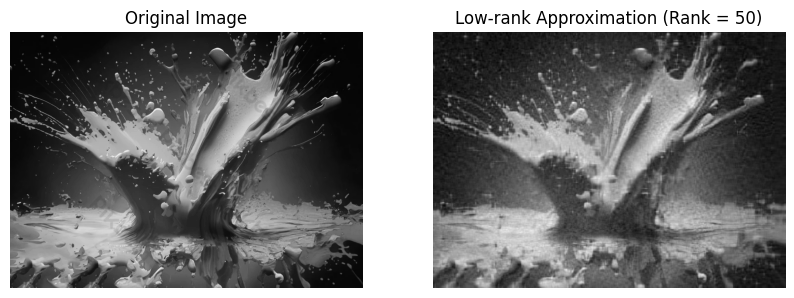

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "photo.jpg"  # Replace "image.jpg" with the path to your image
image = Image.open(image_path)
image_gray = image.convert("L")  # Convert the image to grayscale

# Convert the image to a numpy array
image_array = np.array(image_gray)

# Perform Singular Value Decomposition (SVD)
U, S, V = np.linalg.svd(image_array)

# Set the rank for low-rank approximation
rank = 50  # Adjust the rank as needed for your approximation

# Reconstruct the image with low-rank approximation
approximation = np.dot(U[:, :rank], np.dot(np.diag(S[:rank]), V[:rank, :]))

# Display the original and the approximation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(approximation, cmap='gray')
plt.title(f'Low-rank Approximation (Rank = {rank})')
plt.axis('off')

plt.show()


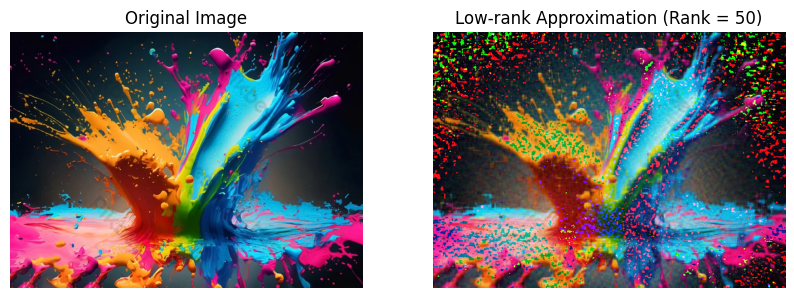

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "photo.jpg"  # Replace "image.jpg" with the path to your image
image = Image.open(image_path)

# Convert the image to a numpy array
image_array = np.array(image)

# Separate color channels
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Perform Singular Value Decomposition (SVD) for each color channel
U_red, S_red, V_red = np.linalg.svd(red_channel)
U_green, S_green, V_green = np.linalg.svd(green_channel)
U_blue, S_blue, V_blue = np.linalg.svd(blue_channel)

# Set the rank for low-rank approximation
rank = 50  # Adjust the rank as needed for your approximation

# Reconstruct the color channels with low-rank approximation
red_approximation = np.dot(U_red[:, :rank], np.dot(np.diag(S_red[:rank]), V_red[:rank, :]))
green_approximation = np.dot(U_green[:, :rank], np.dot(np.diag(S_green[:rank]), V_green[:rank, :]))
blue_approximation = np.dot(U_blue[:, :rank], np.dot(np.diag(S_blue[:rank]), V_blue[:rank, :]))

# Combine the color channels
approximation = np.stack((red_approximation, green_approximation, blue_approximation), axis=-1)

# Display the original and the approximation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.uint8(approximation))
plt.title(f'Low-rank Approximation (Rank = {rank})')
plt.axis('off')

plt.show()
